In [18]:
from TopSpin_to_dataframe import TopSpin_to_dataframe
import pandas as pd
import numpy as np
from Integral_to_conc import Integral_to_conc
import matplotlib.pyplot as plt

In [7]:
# Input experiment code
code = 'MS307'
dataframes = TopSpin_to_dataframe(code) # use TopSpin_to_dataframe to output dictionary of dataframes

# Convert all DataFrame values in the dictionary to float
for key, df in dataframes.items():
    dataframes[key] = df.astype(float)

In [8]:
# Access the data frames by their labels
df0 = dataframes['df0']
df1 = dataframes['df1']
df0

,1,2
0,0.002000,0.198216
1,0.003018,0.201855
2,0.001904,0.211182
3,0.003219,0.206942
4,0.003801,0.190604
5,0.002275,0.224501
6,0.002469,0.060581
7,0.001701,0.065425
8,0.003272,0.059238
9,0.002095,0.052584


In [11]:
# Add column names
df0.columns = ['formate_start', 'acetate_start']
df1.columns = ['formate_end', 'propanoate_end','acetate_end']

# Set row indicies - look to see what you're working with
df0.index = [1.1, 1.2, 1.3, 2.1, 2.2, 2.3, 3.1, 3.2, 4.1, 4.2]
df1.index = [1.1, 1.2, 1.3, 2.1, 2.2, 2.3, 3.1, 3.2, 4.1, 4.2]

# Join dataframes
df2 = pd.concat([df0, df1], axis=1)

df3 = df2.copy()
df3.insert(1, 'propanoate_start', 0)
df3

,formate_start,propanoate_start,acetate_start,formate_end,propanoate_end,acetate_end
1.1,0.002000,0,0.198216,0.216687,0.048968,0.620781
1.2,0.003018,0,0.201855,0.126213,0.048923,3.038833
1.3,0.001904,0,0.211182,0.283856,0.053936,1.012031
2.1,0.003219,0,0.206942,0.233551,0.045032,0.883949
2.2,0.003801,0,0.190604,0.145872,0.046307,0.406607
2.3,0.002275,0,0.224501,0.270690,0.043352,1.035755
3.1,0.002469,0,0.060581,0.001890,0.029694,0.104218
3.2,0.001701,0,0.065425,0.134233,0.045318,0.455679
4.1,0.003272,0,0.059238,0.326274,0.047467,0.463314
4.2,0.002095,0,0.052584,0.137189,0.039440,0.150701


In [13]:
# Insert a new row at index 1
df3.loc[3.3] = 0
df3.loc[4.3] = 0

# Sort index to align properly
df3 = df3.sort_index()
df3.replace(0, np.nan, inplace=True)
df3

,formate_start,propanoate_start,acetate_start,formate_end,propanoate_end,acetate_end
1.1,0.002000,NaN,0.198216,0.216687,0.048968,0.620781
1.2,0.003018,NaN,0.201855,0.126213,0.048923,3.038833
1.3,0.001904,NaN,0.211182,0.283856,0.053936,1.012031
2.1,0.003219,NaN,0.206942,0.233551,0.045032,0.883949
2.2,0.003801,NaN,0.190604,0.145872,0.046307,0.406607
2.3,0.002275,NaN,0.224501,0.270690,0.043352,1.035755
3.1,0.002469,NaN,0.060581,0.001890,0.029694,0.104218
3.2,0.001701,NaN,0.065425,0.134233,0.045318,0.455679
3.3,NaN,NaN,NaN,NaN,NaN,NaN
4.1,0.003272,NaN,0.059238,0.326274,0.047467,0.463314


In [15]:
# input dataframe and weight percent of TSP
df10 = Integral_to_conc(df3, 0.75)
df10

,formate_start,propanoate_start,acetate_start,formate_end,propanoate_end,acetate_end
1.1,0.045782,NaN,1.512449,4.960165,0.560463,4.736755
1.2,0.069091,NaN,1.540215,2.889141,0.559947,23.187238
1.3,0.043595,NaN,1.611383,6.497727,0.617321,7.722112
2.1,0.073681,NaN,1.579030,5.346195,0.515415,6.744808
2.2,0.087014,NaN,1.454367,3.339136,0.530003,3.102540
2.3,0.052080,NaN,1.713014,6.196345,0.496179,7.903133
3.1,0.056519,NaN,0.462251,0.043264,0.339863,0.795214
3.2,0.038943,NaN,0.499216,3.072730,0.518690,3.476972
3.3,NaN,NaN,NaN,NaN,NaN,NaN
4.1,0.074891,NaN,0.452002,7.468711,0.543278,3.535227


In [16]:
# Averages

# create a column for grouping, i.e if the index starts with 1 e.g. 1.1, the column sill contain 1
df11 = df10.copy()
df11['Sample'] = df11.index // 1

# get averages
df_mean = df11.groupby('Sample').mean()
df_stdev = df11.groupby('Sample').std()
df_mean

,formate_start,propanoate_start,acetate_start,formate_end,propanoate_end,acetate_end
Sample,,,,,,
1.0,0.052823,NaN,1.554682,4.782344,0.579244,11.882035
2.0,0.070925,NaN,1.582137,4.960559,0.513866,5.916827
3.0,0.047731,NaN,0.480733,1.557997,0.429276,2.136093
4.0,0.061422,NaN,0.426616,5.304547,0.497346,2.342562


In [17]:
# save data in excel spreadsheets
with pd.ExcelWriter(f'{code} NMR data.xlsx') as writer:
    df3.to_excel(writer, sheet_name='Integrals')
    df10.to_excel(writer, sheet_name='Concentrations')
    df_mean.to_excel(writer, sheet_name='Mean')
    df_stdev.to_excel(writer, sheet_name='Stdev')

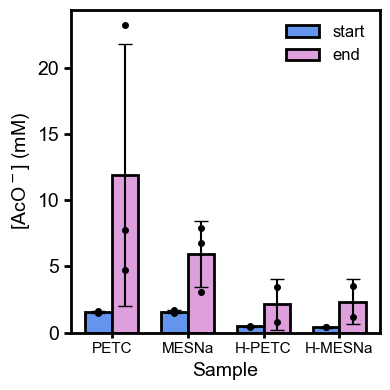

In [19]:
# Plotting
plt.rcParams["font.family"] = "arial"

x_axis_tick_labels = ['PETC', 'MESNa', 'H-PETC', 'H-MESNa']

# Number of categories
n_categories = len(x_axis_tick_labels)

# Position of bars on x-axis
x = np.arange(n_categories)

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(4, 4), linewidth=2)

# Plotting the bars
ax.bar(x - width/2, df_mean['acetate_start'], width, yerr=df_stdev['acetate_start'], label='start',
       capsize = 5, linewidth=2, edgecolor='black', color ='cornflowerblue')
ax.bar(x + width/2, df_mean['acetate_end'], width, yerr=df_stdev['acetate_end'], label='end', capsize=5,
      linewidth=2, edgecolor='black', color ='plum')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('[AcO$^-$] (mM)', fontsize=14)
#ax.set_title('Title')
ax.set_xticks(x)
ax.set_xticklabels(x_axis_tick_labels, fontsize=11)
ax.tick_params(axis='x', width=2)
ax.tick_params(axis='y', direction='out', width=2, labelsize=14, length=5, right=False)
ax.legend(fontsize='large', edgecolor='white', framealpha=0, loc='best')

#Set axis linewidths
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

# create the x-axis for where the points should be positioned (i.e. over the bars)
x_start = x - width/2
x_end = x + width/2
repeated_start = list(np.repeat(x_start, 3))
repeated_end = list(np.repeat(x_end, 3))

# add individual data points
# Plot with customized markers
ax.plot(repeated_start, df10['acetate_start'].tolist(), marker='o',
        linestyle='None', markersize = 4, color = 'black')
ax.plot(repeated_end, df10['acetate_end'].tolist(), marker='o', linestyle='None', markersize = 4, color = 'black')

fig.tight_layout()

plt.show()

# Save the plot
#plt.savefig(f'{code} NMR Acetate.png')
plt.close()